Set Up the Environment:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_moons


Generate a Dataset:

In [2]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)


Define and Train Models:

In [3]:
def create_model(activation_function):
    model = Sequential([
        Dense(10, input_dim=2, activation=activation_function),
        Dense(10, activation=activation_function),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

activation_functions = ['relu', 'sigmoid', 'tanh', 'leaky_relu']
histories = {}

for activation in activation_functions:
    model = create_model(activation)
    history = model.fit(X, y, epochs=20, verbose=0, validation_split=0.2)
    histories[activation] = history


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Visualize the Performance:

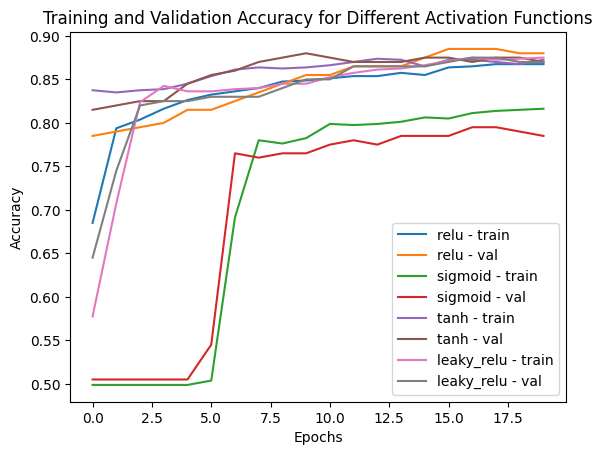

In [4]:
for activation, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{activation} - train')
    plt.plot(history.history['val_accuracy'], label=f'{activation} - val')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different Activation Functions')
plt.legend()
plt.show()


# Experimenting with ELU, SELU, and GELU

ELU (Exponential Linear Unit):

In [5]:
from tensorflow.keras.layers import Activation

def create_model_elu():
    model = Sequential([
        Dense(10, input_dim=2),
        Activation('elu', alpha=1.0),
        Dense(10),
        Activation('elu', alpha=1.0),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


SELU (Scaled Exponential Linear Unit):

In [6]:
from tensorflow.keras.layers import Activation

def create_model_selu():
    model = Sequential([
        Dense(10, input_dim=2),
        Activation('selu'),
        Dense(10),
        Activation('selu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


GELU (Gaussian Error Linear Unit):

In [7]:
from tensorflow.keras.layers import Activation

def gelu(x):
    return 0.5 * x * (1 + tf.math.tanh(tf.math.sqrt(2 / np.pi) * (x + 0.044715 * tf.math.pow(x, 3))))

def create_model_gelu():
    model = Sequential([
        Dense(10, input_dim=2),
        Activation(gelu),
        Dense(10),
        Activation(gelu),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


Implementing Custom Activation Functions

In [9]:
# Implementation in Keras:
from tensorflow.keras.layers import Activation

def swish(x):
    return x * tf.math.sigmoid(x)

def create_model_swish():
    model = Sequential([
        Dense(10, input_dim=2),
        Activation(swish),
        Dense(10),
        Activation(swish),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


 Analyzing Impact on Training Time and Stability

In [10]:
import time

def train_and_measure_time(model, X, y):
    start_time = time.time()
    history = model.fit(X, y, epochs=20, verbose=0, validation_split=0.2)
    end_time = time.time()
    return history, end_time - start_time

times = {}
for activation in activation_functions:
    model = create_model(activation)
    history, training_time = train_and_measure_time(model, X, y)
    times[activation] = training_time


Stability

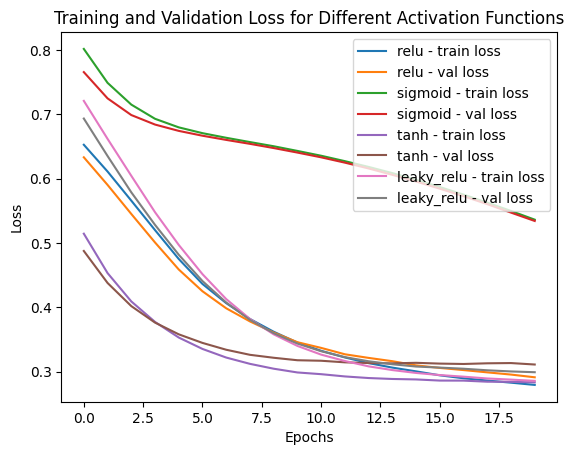

In [11]:
for activation, history in histories.items():
    plt.plot(history.history['loss'], label=f'{activation} - train loss')
    plt.plot(history.history['val_loss'], label=f'{activation} - val loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Activation Functions')
plt.legend()
plt.show()
